# pyhton 到 机器学习入门 教程目录

## 第1节：下载并安装python及Scipy生态

In [11]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Feb  2 2020, 23:10:31) 
[Clang 11.0.0 (clang-1100.0.33.17)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.2
pandas: 1.0.1
sklearn: 0.22.1


## 熟悉使用python、numpy、matplotlib和pandas

   one  two  three
a    1    2      3
b    4    5      6


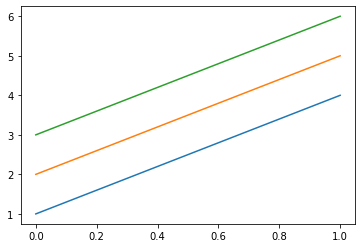

In [2]:
# 导入各个库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

myarray = np.array([[1, 2, 3], [4, 5, 6]]) # 使用numpy数组
rownames = ['a', 'b']
colnames = ['one', 'two', 'three'] # 使用列表操作
mydataframe = pd.DataFrame(myarray, index=rownames, columns=colnames) #生成DataFrame
print(mydataframe)

mp = plt.plot(myarray) # 使用matplotlib绘制简单图表
plt.show() # 显示图像

## 加载CSV数据反ff

有几种常用的方法供参考：
- 使用标准库中CSV的CSV.reader()加载
- 使用第三方库numpy中的numpy.loadtxt()加载
- 使用第三方库pandas中的pandas.read_csv()加载

## 对数据进行描述性统计分析

有以下几点操作：
- 使用head()和tail()函数查看数据样本
- 使用shape属性查看数据规格
- 使用dtypes属性查看每个变量的数据类型
- 使用describe()函数查看数据描述
- 使用corr()函数计算各个变量之间的相关性

In [ ]:
head_5 = data.head(5) # 查看前5行
print(head_5)
tail_5 = data.tail(5) # 查看后5行
print(tail_5)
shape_ = data.shape # 查看数据规格，即多少行多少列
print(shape)
dtypes_ = data.dtypes # 查看每个变量的数据类型
print(dtypes_)
corr_ = data.corr() # 查看各个变量之间的相关性
print(corr_)
description = data.describe() # 查看数据描述
print(description)

## 对数据进行可视化分析

有以下几点操作：
- 使用hist()方法创建每个变量的直方图
- 使用plot(kind='box')方法创建每个变量的箱图
- 使用plotting.scatter_matrix()方法创建矩阵散点图

In [ ]:
import matplotlib.pyplot as plt # 导入绘图模块
data.hist() # 直方图
data.plot(kind='box') # 箱图
pd.plotting.scatter_matrix(data) # 矩阵散点图
plt.show() # 展示图表

## 数据预处理

有一些方法技术可以用于数据预处理，比如：
- 数据标准化。
- 数据二值化.
- 分类数据连续化。
- 估算缺失的值。

上面提到的数据预处理技术都可以通过scikit-learn提供的方法实现。
简单介绍下scikit-learn，scikit-learn拥有可以用于监督和无监督学习的方法，一般来说监督学习使用的更多。sklearn中的大部分函数可以归为估计器(Estimator)和转化器(Transformer)两类。

<span class="mark">估计器(Estimator)其实就是模型，它用于对数据的预测或回归。</span>基本上估计器都会有以下几个方法：
- <span class="burk">fit(x,y):传入数据以及标签即可训练模型</span>，训练的时间和参数设置，数据集大小以及数据本身的特点有关
- <span class="burk">score(x,y)用于对模型的正确率进行评分(范围0-1)。</span>但由于对在不同的问题下，评判模型优劣的的标准不限于简单的正确率，可能还包括召回率或者是查准率等其他的指标，特别是对于类别失衡的样本，准确率并不能很好的评估模型的优劣，因此在对模型进行评估时，不要轻易的被score的得分蒙蔽。
- <span class="burk">predict(x)用于对数据的预测，它接受输入，并输出预测标签，输出的格式为numpy数组。</span>我们通常使用这个方法返回测试的结果，再将这个结果用于评估模型。

<span class="mark">转化器(Transformer)用于对数据的处理，例如标准化、降维以及特征选择等等。</span>同与估计器的使用方法类似:
- fit(x,y):该方法接受输入和标签，计算出数据变换的方式。
- transform(x):根据已经计算出的变换方式，返回对输入数据x变换后的结果（不改变x）
- fit_transform(x,y) :该方法在计算出数据变换方式之后对输入x就地转换

In [ ]:
# 标准化数据 (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler # 导入标准化函数
import pandas
import numpy

In [ ]:
# 将数据分割为输入和响应两部分，即X和Y
X = array[:,0:8]
Y = array[:,8]
# 对数据进行标准化处理
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

## 通过重采样进行算法评估

模型在验证数据中的评估常用的是交叉验证，又称循环验证。它将原始数据分成K组(K-Fold)，将每个子集数据分别做一次验证集，其余的K-1组子集数据作为训练集，这样会得到K个模型。这K个模型分别在验证集中评估结果，最后的误差MSE(Mean Squared Error)加和平均就得到交叉验证误差。
交叉验证有效利用了有限的数据，并且评估结果能够尽可能接近模型在测试集上的表现，可以做为模型优化的指标使用。

最后要通过某种评估规则计算出模型准确度的分数，这里提供了cross_val_score(scoring='')函数评估交叉验证结果

In [ ]:
这一节要做的是：
- 将数据集切分为训练集和验证集
- 使用k折交叉验证估算算法的准确性
- 使用cross_val_score()函数评估交叉验证结果，输出k折交叉验证准确度评分

### 使用交叉验证评估模型

In [2]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [8]:
# 加载数据
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
url = "https://github.com/jbrownlee/Datasets/blob/master/pima-indians-diabetes.data.csv"
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(url, names=names)
dataframe.to_csv('./data/pima-indians.csv', sep='\t', index=False)

In [10]:
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]
# 使用k折交叉验证，n-split就是K值，shuffle指是否对数据洗牌，random_state为随机种子
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
# 使用逻辑回归模型，这是一个分类算法
model = LogisticRegression(solver='liblinear')
# 交叉验证，cv代表交叉验证生成器，这里是k折，scoring代表评估规则，输出模型对于10个验证数据集准确度的评估结果
results = cross_val_score(model,
                          X,
                          Y,
                          cv=kfold,
                          scoring='neg_mean_squared_error')
# 打印这10个结果的平均值和标准差
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean() * 100.0, results.std() * 100.0)

Accuracy: %.3f%% (%.3f%%)


/Users/mac/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: '<html lang="en">'

  FitFailedWarning)
/Users/mac/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: '<!DOCTYPE html>'

  FitFailedWarning)
/Users/mac/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: '<!DOCTYPE html>'

  FitFailedWarning)
/Users/mac/.pyenv/versions/3.7.3/lib

TypeError: unsupported operand type(s) for %: 'NoneType' and 'tuple'

## 模型比较和选择

## 通过算法调整提高模型精度

## 通过集合预测提高模型精度

## 完善并保存模型